#  Analysis of the economic, ecological footprints and life expectancy among happy countries (2015 - 2017).

In this project, we are reserach the problem of what are the characteristics of happies country. We find a dataset that rank countries' happiness in 2015-2017. Depending on this dataset, we consider to inverstigate the happiness with the relationship of economics, enviorment and people's life expextancy. Our three hypothesises are related to it. First,we think countries which have higher GDP and CPI are happier. Second, Countries which have bigger ecological footprints are happier. Third, the people who live in happier countries are healthier.
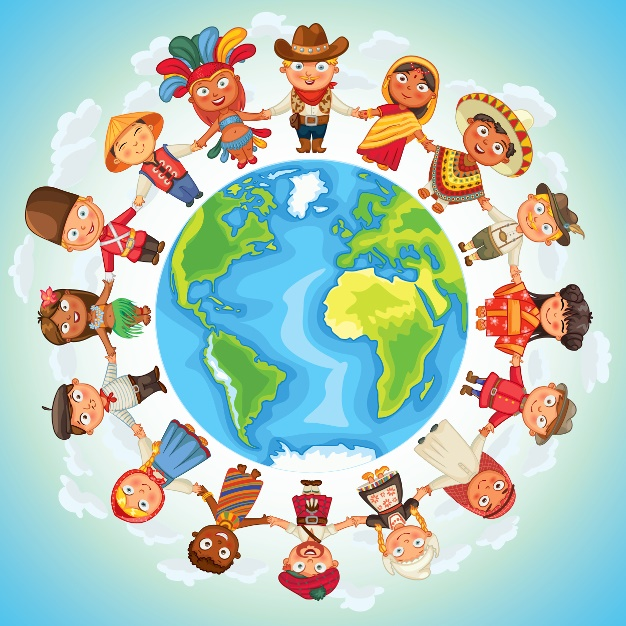
Note：World Happiness Report favours the cold (and the rich). (2015) Retrieved from https://m.traveller24.com/Explore/World-Happiness-Report-favours-the-cold-and-the-rich-20150428


In [1]:
from pandas import DataFrame
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#get the file name in directory  (world happiness)
def fetch_dataset_file(file_dir):
    """
    Function to read in filename
    Argument: file_dir: file directory 
    Return:
            k:the list of files name
    """
    for i,j,k in os.walk(file_dir):
        return k

#merge the dataset  (world happiness)
def merge_dataset(file_dir,file_name,merge_on):
    """
    Function to merge several datasets
    Argument: 
            fileDirectory: file directory
            file_name:the list of files name
            merge_on:the attribute that merged
    Return:
            data: merged dataframe
    """
    tmp = pd.read_csv(file_dir+'//'+file_name[0])
    data = tmp[tmp.columns.tolist()[1:]].add_prefix(file_name[0].split('.')[0]+'_')          #add prefix to columns
    data.insert(0,merge_on,tmp[merge_on])                                                    #add merged attribute column
    for i in range(1,len(file_name)):
        tmp = pd.read_csv(file_dir+'//'+file_name[i])
        d_tmp = tmp[tmp.columns.tolist()[1:]].add_prefix(file_name[i].split('.')[0]+'_')
        d_tmp.insert(0,merge_on,tmp[merge_on])
        data = pd.merge(data,d_tmp,left_on = merge_on,right_on = merge_on)                  #merge dataset
    data.dropna(axis=0, how='any', inplace=True)                                           #drop nal values
    return data

#find the average happiness score of each country in three years
def country_sort(happiness_data):
    """
    Function to sort countries by average happies scores in three years
    Argument: 
            happiness_data: the data of world happiness
    Return:
            h_d: the data of each country's average happiness score in three years
    """
    score = (happiness_data['2015_Happiness Score'] + happiness_data['2016_Happiness Score'] #calculate average happiness scores
    + happiness_data['2017_Happiness.Score'])/3
    h_d = DataFrame({'Country':happiness_data['Country'],'Avg_Happiness Score':score})
    h_d.sort_values("Avg_Happiness Score",inplace=True)                                     #sort dataset
    return h_d

#fetch attributes
def fetch_attributes(dataset,targetvalue,attribute,target):
    """
    Function to select specific rows and columns
    Return:
            dataset: dataframe which fetch attributes
    """
    return dataset.loc[dataset[target].isin(targetvalue)][attribute]

#select corresponding year (ecological footprints and biocapacity)
def select_year(dataset,start_year,end_year):
    """
    Function to select years from dataset
    Argument:
            dataset:processing dataset
            start_year:select year from
            end_year:select year ended
    Return:
            data: the data between start year and end year
    """
    country = []
    dataset = dataset.loc[dataset['year'].isin(range(start_year,end_year+1))]              #data from start year to end year
    tmp = pd.DataFrame(dataset.groupby([dataset['country'],dataset['record']]).size())
    tmp = tmp[tmp.values==(end_year-start_year+1)]
    for i in tmp.index.tolist():
        country.append(i[0])
    data = fetch_attributes(dataset,country,['country','record','carbon','total','year'],'country')
    return data
    

In [3]:
file_happiness = fetch_dataset_file('world-happiness')                                   #read world happiness datasets
h_df = merge_dataset('world-happiness',file_happiness,'Country')                         

In [4]:
NFA_df = pd.read_csv('NFA 2018.csv')                                                     #read ecological footprints datase
NFA_df.dropna(axis=0, how='any', inplace=True)
nfa_df = fetch_attributes(NFA_df,['EFConsPerCap'],['country','record','carbon','total','year'],'record')  #only select ecological footprints per capita

### 1.Countries which have higher GDP and CPI are more happier.
For the economics, we select two datasets which provide GDP and CPI of all the countries.GDP 
From analysis result: Countries which have higher GDP are happier, but CPI has not obvious relationship with  happies.

In [5]:
h_df_15_17=h_df[['Country','2015_Happiness Score','2016_Happiness Score','2017_Happiness.Score']]   #select three years' average happiness score

In [6]:
gdpdf = pd.read_csv('WEODataGDP.CSV')                                                                #read world GDP dataset 
gdp_h_df_15_17= pd.merge(gdpdf, h_df_15_17, left_on='Country', right_on='Country', how='inner')     #merage dataset with world happiness
gdp_h_df_15_17.dropna(axis=0, how='any', inplace=True)                                             #drop nal values 
gdp_h_df_15_17=gdp_h_df_15_17[gdp_h_df_15_17['Subject Descriptor']=='Gross domestic product per capita, current prices']

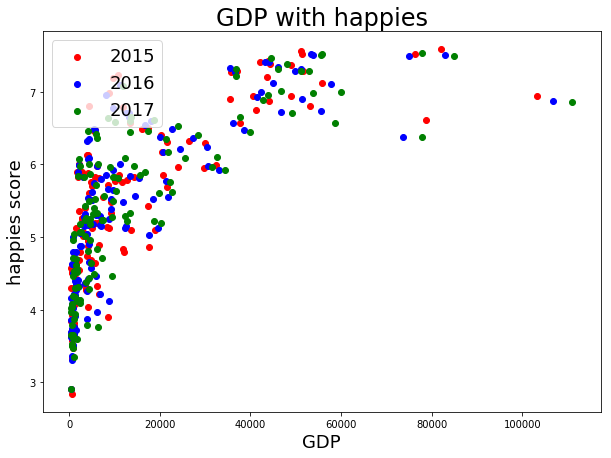

In [7]:
plt.figure(figsize=(10,7))                                                 #scatter plot which show relationship between GDP and happiness
l1=plt.scatter(gdp_h_df_15_17['2015'],gdp_h_df_15_17['2015_Happiness Score'],color='red',label='2015')
l2=plt.scatter(gdp_h_df_15_17['2016'],gdp_h_df_15_17['2016_Happiness Score'],color='blue',label='2016')
l2=plt.scatter(gdp_h_df_15_17['2017'],gdp_h_df_15_17['2017_Happiness.Score'],color='green',label='2017')
plt.title('GDP with happies',size=24)
plt.xlabel('GDP',size=18)
plt.ylabel('happies score',size=18)
plt.legend(loc=2, prop={'size': 18})
plt.show()

In [8]:
cpidf = pd.read_csv('WEODataCPI.CSV')                                                             #read world CPI dataset 
cpi_h_df_15_17= pd.merge(cpidf, h_df_15_17, left_on='Country', right_on='Country', how='inner') #merage dataset with world happiness
cpi_h_df_15_17.dropna(axis=0, how='any', inplace=True)                                          #drop nal values 

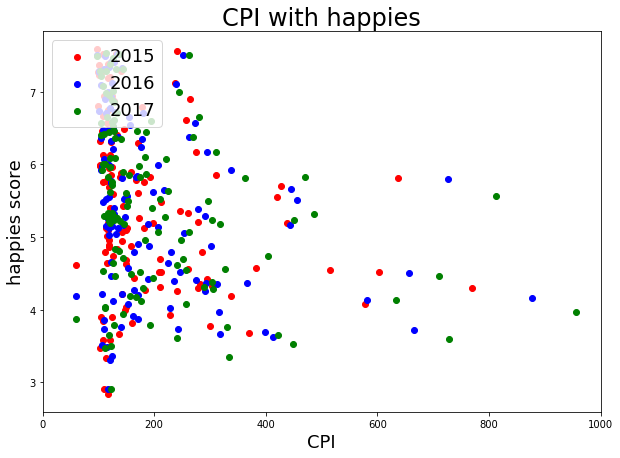

In [9]:
plt.figure(figsize=(10,7))                                               #scatter plot which show relationship between CPI and happiness

l1=plt.scatter(cpi_h_df_15_17['2015'],cpi_h_df_15_17['2015_Happiness Score'],color='red',label='2015')
l2=plt.scatter(cpi_h_df_15_17['2016'],cpi_h_df_15_17['2016_Happiness Score'],color='blue',label='2016')
l2=plt.scatter(cpi_h_df_15_17['2017'],cpi_h_df_15_17['2017_Happiness.Score'],color='green',label='2017')
plt.title('CPI with happies',size=24)
plt.xlabel('CPI',size=18)
plt.ylabel('happies score',size=18)
plt.legend(loc=2, prop={'size': 18})
plt.xlim(0,1000)
plt.show()

### 2.Countries which have bigger ecological footprints are more happier.
Ecological footprints reflects carbon emissons in people's daily life. We select an ecological footprints dataset to indicate the enviorment influence in each country. With the increase in carbon emissions per capita, countries will gain higher happiness scores. However, after they reach the maximum score, more carbon emission will cause a decrease in the happiness score.

In [10]:
c_nfa = fetch_attributes(nfa_df,nfa_df['country'],['country','record','carbon','total','year'],'country')
c_nfa = select_year(c_nfa,1994,2014)                                                   
c_nfa_mean=c_nfa.groupby('country')['carbon'].agg(['mean'])                                               #calculate average carbon emissions
c_nfa_mean

,mean
country,
Albania,0.823821
Angola,0.239925
Argentina,1.114380
Armenia,0.632576
Australia,5.050887
...,...
"Venezuela, Bolivarian Republic of",1.648497
Viet Nam,0.500970
Yemen,0.358400


In [11]:
happycountries=country_sort(h_df)
happycountries

,Country,Avg_Happiness Score
144,Burundi,2.905000
143,Syria,3.179000
145,Togo,3.212333
141,Rwanda,3.483667
142,Benin,3.493667
...,...,...
5,Finland,7.429333
3,Norway,7.519000
1,Iceland,7.522000
2,Denmark,7.525000


In [12]:
combined = pd.merge(happycountries, c_nfa_mean, left_on='Country', right_on='country', how='inner')
combined

,Country,Avg_Happiness Score,mean
0,Burundi,2.905000,0.026210
1,Togo,3.212333,0.190506
2,Rwanda,3.483667,0.050328
3,Benin,3.493667,0.256709
4,Guinea,3.590000,0.118090
...,...,...,...
81,Netherlands,7.364667,4.212791
82,Canada,7.382333,5.450756
83,Norway,7.519000,2.069268
84,Denmark,7.525000,3.897932


Text(0,0.5,'Frequency')

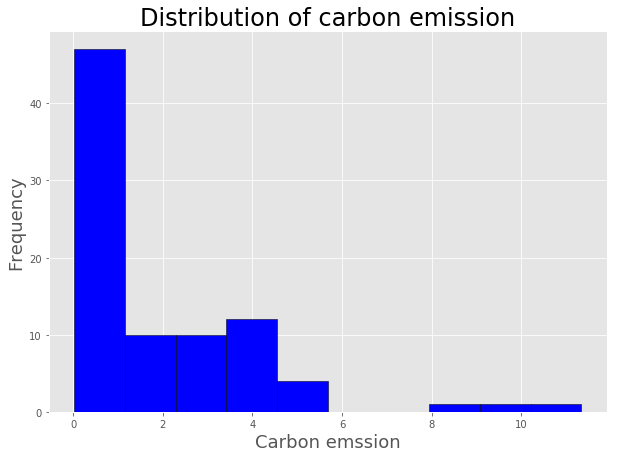

In [13]:
plt.style.use('ggplot')                                                                     # frequency plot for carbon emission

combined['mean'].plot(kind='hist',color='blue',edgecolor='black',figsize=(10,7))
plt.title('Distribution of carbon emission', size=24)
plt.xlabel('Carbon emssion', size=18)
plt.ylabel('Frequency', size=18)

Text(0,0.5,'happies')

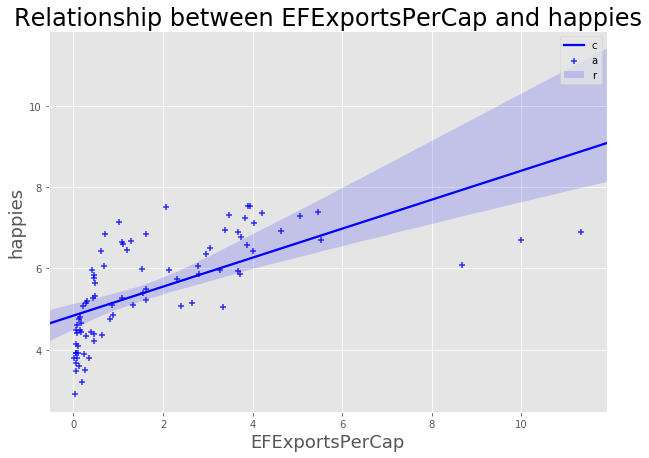

In [14]:
# Regression plot using seaborn.
fig = plt.figure(figsize=(10,7))
sns.regplot(x=combined['mean'],y=combined['Avg_Happiness Score'],color='blue', marker='+')

# Legend, title and labels.
plt.legend(labels='carbon')
plt.title('Relationship between EFExportsPerCap and happies', size=24)
plt.xlabel('EFExportsPerCap', size=18)
plt.ylabel('happies', size=18)

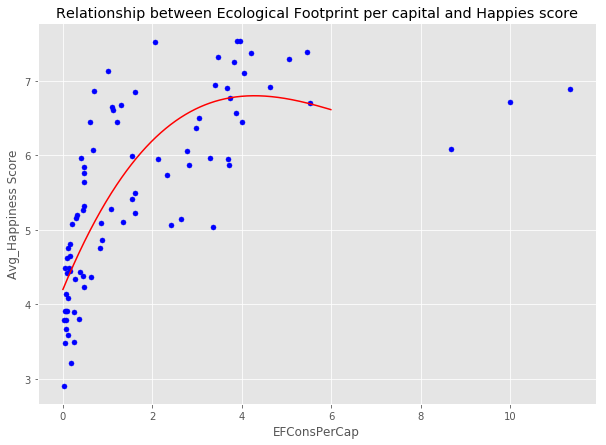

In [15]:
def f_3(x, A, B, C, D):                                                                       #cubic equation to fit data
    """
    Function to calculate cubic equation
        Argument:
            x:independent variable
            A:cubic term parameter
            B:quadratic term parameter
            C:primary term parameter
            D:constant parameter
        Return:
            the result of cubic equation
    """
    return A*x*x*x + B*x*x + C*x + D
def plot_test(x0,y0):                                                                        #fit data with curve
    """
        Function to fit curve in relationship between Ecological Footprint per capital and Happies score
        Argument:
            x0:independent variable
            y0:dependent variable
        Return:
            show scatter plot
        """
    plt.figure(figsize=(10,7))
    plt.scatter(x0[:], y0[:], 25, "blue")
    A3, B3, C3, D3= curve_fit(f_3, x0, y0)[0]
    x3 = np.arange(0, 6, 0.01)
    y3 = A3*x3*x3*x3 + B3*x3*x3 + C3*x3 + D3 
    plt.plot(x3, y3, "red")
    plt.title("Relationship between Ecological Footprint per capital and Happies score")
    plt.xlabel('EFConsPerCap')
    plt.ylabel('Avg_Happiness Score')
    plt.show()
    return

plot_test(combined['mean'],combined['Avg_Happiness Score'])

### 3. The people who in happier countries are more healthier.
Life expextancy reflects the medical level and quality of life. After analyzing the countries from 2015 to 2017, we conclude that countries which are happier have longer life expectancy.  People in happier countries are healthier.

In [16]:
def healthyplot(x,y):
    """
        Function to fit curve in relationship between Ecological Footprint per capital and Happies score
        Argument:
            x:independent variable
            y:dependent variable
        Return:
            show scatter plot
    """
    X = h_df[x].values.reshape(-1, 1)  # values converts it into a numpy array 
    Y = h_df[y].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    plt.scatter(X, Y,color='blue')
    plt.plot(X, Y_pred, color='red')
    plt.show()

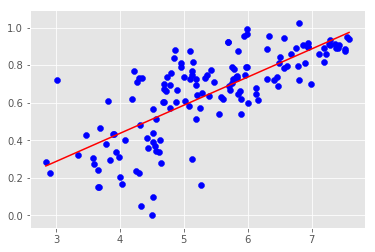

In [17]:
healthyplot('2015_Happiness Score','2015_Health (Life Expectancy)')                               #linear regression using data in 2015

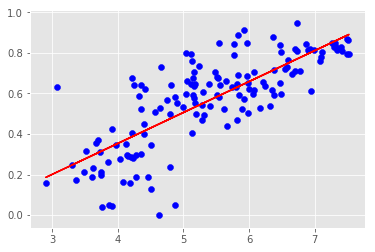

In [18]:
healthyplot('2016_Happiness Score','2016_Health (Life Expectancy)')                             #linear regression using data in 2016

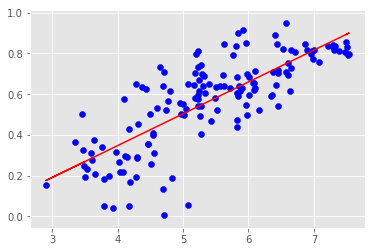

In [19]:
healthyplot('2017_Happiness.Score','2017_Health..Life.Expectancy.')                           #linear regression using data in 2017